This notebook is part of an exploratory analysis of machine learning used to decompose hyperspectral datasets of hybrid perovskite nanoscale materials.

Two machine learning models are used: Nonnegative Matrix Factorization and Variational Autoencoders

**Notebook Two: Non-negative Matrix Factorization**

# Imports, Functions, and Classes

## Imports

In [14]:
%run ML_HSI_Analysis_1_Preprocessing.ipynb

SEM images: f1_img1, f2_img1
CL images: f1_img2, f2_img2
Denoised data: f1_sb_median, f2_sb_median
2D denoised data: f1_denoised_2d, f2_denoised_2d


In [21]:
import nimfa
import sklearn
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from sklearn import metrics

# Analysis with Scikit Learn (without denoising)

This section is mostly exploratory, feel free to skip to the next section

In [2]:
# Number of components of W and H
n_comp = 2

In [3]:
# PCA
model_1PCA = PCA(n_components=n_comp)
X_1PCA_s = model_1PCA.fit_transform(f1_img2_2d) #Spectral component
X_1PCA_i = (model_1PCA.fit_transform(f1_img2_2d.transpose())).transpose() #Image component

model_2PCA = PCA(n_components=n_comp)
X_2PCA_s = model_2PCA.fit_transform(f2_img2_2d)
X_2PCA_i = (model_2PCA.fit_transform(f2_img2_2d.transpose())).transpose()

# NMF
model_1a = NMF(n_components=n_comp, init='random', random_state=0, max_iter=100000)
W_1a = model_1a.fit_transform(f1_img2_2d)
H_1a = model_1a.components_
#model_1a.inverse_transform(W_1a)

model_2a = NMF(n_components=n_comp, init='random', random_state=0, max_iter=100000)
W_2a = model_2a.fit_transform(f2_img2_2d)
H_2a = model_2a.components_

# Nonnegative Double Singular Value Decomposition (better for sparseness)
model_1b = NMF(n_components=n_comp, init='nndsvd', random_state=0, max_iter=100000)
W_1b = model_1b.fit_transform(f1_img2_2d)
H_1b = model_1b.components_

model_2b = NMF(n_components=n_comp, init='nndsvd', random_state=0, max_iter=100000)
W_2b = model_2b.fit_transform(f2_img2_2d)
H_2b = model_2b.components_

# NNDSVD with zeros filled with the average of X (better when sparseness is not desired)
model_1c = NMF(n_components=n_comp, init='nndsvda', random_state=0, max_iter=100000)
W_1c = model_1c.fit_transform(f1_img2_2d)
H_1c = model_1c.components_

model_2c = NMF(n_components=n_comp, init='nndsvda', random_state=0, max_iter=100000)
W_2c = model_2c.fit_transform(f2_img2_2d)
H_2c = model_2c.components_

# NNDSVD w zeros filled with small random values (faster, less acurate, sparseness not desired)
model_1d = NMF(n_components=n_comp, init='nndsvdar', random_state=0, max_iter=100000)
W_1d = model_1d.fit_transform(f1_img2_2d)
H_1d = model_1d.components_

model_2d = NMF(n_components=n_comp, init='nndsvdar', random_state=0, max_iter=100000)
W_2d = model_2d.fit_transform(f2_img2_2d)
H_2d = model_2d.components_

## (Extra)

### NMF (randomly generated matrices)

#### Figure 1a (NMF, init='random')

In [4]:
"""
Params:
    X: {array-like, sparse matrix} of shape (n_samples, n_features)
Training vector, where n_samples is the number of samples and n_features is the number of features.

    y: Ignored
Not used, present for API consistency by convention.

    W: array-like of shape (n_samples, n_components)
If init=’custom’, it is used as initial guess for the solution.

    H: array-like of shape (n_components, n_features)
If init=’custom’, it is used as initial guess for the solution.
"""

'\nParams:\n    X: {array-like, sparse matrix} of shape (n_samples, n_features)\nTraining vector, where n_samples is the number of samples and n_features is the number of features.\n\n    y: Ignored\nNot used, present for API consistency by convention.\n\n    W: array-like of shape (n_samples, n_components)\nIf init=’custom’, it is used as initial guess for the solution.\n\n    H: array-like of shape (n_components, n_features)\nIf init=’custom’, it is used as initial guess for the solution.\n'

In [5]:
X_1a = np.matmul(W_1a, H_1a)
f1_img2_initial_nmf = np.reshape(X_1a, (f1_img2.shape[0], f1_img2.shape[1], f1_img2.shape[2]), order='C')

In [1]:
initial_plot("Figure 1a (NMF)", f1_img1, f1_img2_initial_nmf, 710, 
             f1_x_points, f1_y_points)

#### Figure 2a (NMF, init='random')

In [ ]:
X_2a = np.matmul(W_2a, H_2a)
f2_img2_initial_nmf = np.reshape(X_2a, (f2_img2.shape[0], f2_img2.shape[1], f2_img2.shape[2]), order='C')

In [ ]:
initial_plot("Figure 2a (NMF)", f1_img1, f2_img2_initial_nmf, 405, 
             f2_x_points, f2_y_points)

### NMF (NNDSVD)

#### Figure 1b (NMF, init='nndsvd')

In [ ]:
X_1b = np.matmul(W_1b, H_1b)
f1_img2_initial_nmf_nndsvd = np.reshape(X_1b, (1024, 122, 164), order='C')

In [ ]:
initial_plot("Figure 1b (NNDSVD)", f1_img1, f1_img2_initial_nmf_nndsvd, 710, 
             f1_x_points, f1_y_points)

#### Figure 2b (NMF, init='nndsvd')

In [ ]:
X_2b = np.matmul(W_2b, H_2b)
f2_img2_initial_nmf_nndsvd = np.reshape(X_2b, (1024, 77, 91), order='C')

In [ ]:
initial_plot("Figure 2b (NNDSVD)", f1_img1, f2_img2_initial_nmf_nndsvd, 405, 
             f2_x_points, f2_y_points)

### NMF (NNDSVDa)

#### Figure 1c (NMF, init='nndsvda')

In [ ]:
X_1c = np.matmul(W_1c, H_1c)
f1_img2_initial_nmf_nndsvda = np.reshape(X_1c, (1024, 122, 164), order='C')

In [ ]:
initial_plot("Figure 1c (NNDSVDa)", f1_img1, f1_img2_initial_nmf_nndsvda, 710, 
             f1_x_points, f1_y_points)

#### Figure 2c (NMF, init='nndsvda')

In [ ]:
X_2c = np.matmul(W_2c, H_2c)
f2_img2_initial_nmf_nndsvda = np.reshape(X_2c, (1024, 77, 91), order='C')

In [ ]:
initial_plot("Figure 2c (NNDSVDa)", f1_img1, f2_img2_initial_nmf_nndsvda, 405, 
             f2_x_points, f2_y_points)

### NMF (NNDSVDar)

#### Figure 1d (NMF, init='nndsvdar')

In [ ]:
X_1d = np.matmul(W_1d, H_1d)
f1_img2_initial_nmf_nndsvdar = np.reshape(X_1d, (1024, 122, 164), order='C')

In [ ]:
initial_plot("Figure 1d (NNDSVDar)", f1_img1, f1_img2_initial_nmf_nndsvdar, 710, 
             f1_x_points, f1_y_points)

#### Figure 2d (NMF, init='nndsvdar')

In [ ]:
X_2d = np.matmul(W_2d, H_2d)
f2_img2_initial_nmf_nndsvdar = np.reshape(X_2d, (1024, 77, 91), order='C')

In [ ]:
initial_plot("Figure 2d (NNDSVDar)", f1_img1, f2_img2_initial_nmf_nndsvdar, 405, 
             f2_x_points, f2_y_points)

## Plotting components for specific methods

### Plot code

In [ ]:
def initial_components_plot(suptitle, n_comp, img_matrix, spect_matrix, xpix, ypix):
    
    rows = n_comp # Number of components in W and H
    columns = 2

    fig = plt.figure(figsize=(15,rows*6))
    fig.suptitle(suptitle, fontsize=30)

    # Images and plots
    plt_number = 1
    count = 0
    for i in range(rows):

        fig_img = fig.add_subplot(rows, columns, plt_number)
        fig_img.imshow(img_matrix[count,:].reshape(ypix, xpix))
        fig_img.set_title("Image component " + str(count))

        plt_number +=1

        fig_plt = fig.add_subplot(rows, columns, plt_number)
        fig_plt.plot(spect_matrix[:,count], markersize=10, c='blue', lw=2)
        fig_plt.set_title("Spectral component " + str(count))

        plt_number +=1
        count += 1

    plt.show()

### PCA

In [ ]:
print(X_1PCA_i.shape)
print(X_1PCA_s.shape)

In [ ]:
initial_components_plot("Figure 1 (PCA)", n_comp, X_1PCA_i, X_1PCA_s, f1_xpix, f1_ypix)

### NMF

In [ ]:
print(W_1a.shape)
print(H_1a.shape)

In [ ]:
initial_components_plot("Figure 1 (NMF)", n_comp, H_1a, W_1a, f1_xpix, f1_ypix)

## Plotting components for all methods

### Plot Code

In [ ]:
def not_denoised_plot(suptitle, n_comp, spect_matrices, img_matrices, analysis_type, color, 
                      xpix, ypix):

    rows = len(spect_matrices)
    columns = n_comp+2
    gs = GridSpec(rows, columns)
    gs.update(wspace=0.2,hspace=0.3)

    figaspect = plt.figaspect(float(ypix*3)/float(xpix*6))
    figsize = (20,32/(figaspect[0]/figaspect[1]))
    fig = plt.figure(figsize=figsize, dpi=800)
    fig.patch.set_facecolor('white')
    fig.suptitle(suptitle, fontsize=30)

    row_count = 0
    for i in range(rows):

        fig_plt = fig.add_subplot(gs[row_count,columns-2:])
        fig_plt.set_title("Spectral components")

        column_count = 0
        for j in range(columns-2):

            fig_img = fig.add_subplot(gs[row_count,column_count])
            fig_img.imshow(img_matrices[row_count][column_count,:].reshape(ypix, xpix))
            fig_img.set_title(analysis_type[row_count] + " img comp " + str(column_count))
            fig_img.set_xticks([])
            fig_img.set_yticks([])
            fig_img.tick_params(color=color[j])
            for spine in fig_img.spines.values():
                spine.set_edgecolor(color[j])
                spine.set(lw=5)

            fig_plt.plot(spect_matrices[row_count][:,column_count], c=color[j], lw=1)

            column_count += 1

        row_count += 1

### Figure 1

In [ ]:
spect_matrices_1_not_denoised = [X_1PCA_s, W_1a, W_1b, W_1c, W_1d] # Spectral components
img_matrices_1_not_denoised = [X_1PCA_i, H_1a, H_1b, H_1c, H_1d] # Image components

In [ ]:
analysis_type_not_denoised = ["PCA", "NMF", "NNDSVD", "NNDSVDa", "NNDSVDar"]

In [ ]:
not_denoised_plot("Figure 1 (analysis with various techniques)", n_comp, 
                  spect_matrices_1_not_denoised, img_matrices_1_not_denoised, 
                  analysis_type_not_denoised, color, f1_xpix, f1_ypix)

### Figure 2

In [ ]:
spect_matrices_2_not_denoised = [X_2PCA_s, W_2a, W_2b, W_2c, W_2d]
img_matrices_2_not_denoised = [X_2PCA_i, H_2a, H_2b, H_2c, H_2d]

In [ ]:
not_denoised_plot("Figure 2 (analysis with various techniques)", n_comp, 
                  spect_matrices_2_not_denoised, img_matrices_2_not_denoised, 
                  analysis_type_not_denoised, color, f2_xpix, f2_ypix)

# Analysis with Scikit Learn (with denoising)

### Extra: Median filter (with background)

Extra

In [22]:
n_comp = 2

In [2]:
f1_median_2d = np.reshape(f1_1d_median, (f1_zpix, f1_ypix*f1_xpix), order='C')

In [ ]:
# PCA
model_1PCA_m = PCA(n_components=n_comp)
X_1PCA_s_m = model_1PCA_m.fit_transform(f1_median_2d) #Spectral component
X_1PCA_i_m = (model_1PCA_m.fit_transform(f1_median_2d.transpose())).transpose() #Image component

# NMF
model_1a_m = NMF(n_components=n_comp, init='random', random_state=0, max_iter=100000)
W_1a_m = model_1a_m.fit_transform(f1_median_2d)
H_1a_m = model_1a_m.components_
#model_1a.inverse_transform(W_1a)

# Nonnegative Double Singular Value Decomposition (better for sparseness)
model_1b_m = NMF(n_components=n_comp, init='nndsvd', random_state=0, max_iter=100000)
W_1b_m = model_1b_m.fit_transform(f1_median_2d)
H_1b_m = model_1b_m.components_

# NNDSVD with zeros filled with the average of X (better when sparseness is not desired)
model_1c_m = NMF(n_components=n_comp, init='nndsvda', random_state=0, max_iter=100000)
W_1c_m = model_1c_m.fit_transform(f1_median_2d)
H_1c_m = model_1c_m.components_

# NNDSVD w zeros filled with small random values (faster, less acurate, sparseness not desired)
model_1d_m = NMF(n_components=n_comp, init='nndsvdar', random_state=0, max_iter=100000)
W_1d_m = model_1d_m.fit_transform(f1_median_2d)
H_1d_m = model_1d_m.components_

In [ ]:
spect_matrices_1_m = [X_1PCA_s_m, W_1a_m, W_1b_m, W_1c_m, W_1d_m]
img_matrices_1_m = [X_1PCA_i_m, H_1a_m, H_1b_m, H_1c_m, H_1d_m]

In [ ]:
not_denoised_plot("Figure 1 (median filter with background)", n_comp, 
                  spect_matrices_1_m, img_matrices_1_m, 
                  analysis_type_not_denoised, color, f1_xpix, f1_ypix)

## Blind NMF plotting 2-6 components

Non-negative Matrix Factorization (NMF) decomposes a large samples by features matrix into two matrices of lower rank, one of samples by components, the other components by features, the specified components dimension the two have in common being the number of principal components we would like to represent our data with.

The goal is to decompose the spectral signatures that show up in the data into their own respective components with minimal overlap into other signatures.

Here, we first investigate the necessary amount of components with which to represent the data

### Code

First we prepare the models with various components from 2-6

In [23]:
tolerance = 0
iterations = 200
# 2 Components
nmf_2comp = NMF(n_components=2, init='random', solver='cd', beta_loss='frobenius', 
                tol=tolerance, max_iter=iterations, random_state=None, alpha_W=0.0, 
                   alpha_H='same', l1_ratio=0.0, verbose=0, shuffle=False)
# 3 Components
nmf_3comp = NMF(n_components=3, init='random', solver='cd', beta_loss='frobenius', 
                tol=tolerance, max_iter=iterations, random_state=None, alpha_W=0.0, 
                   alpha_H='same', l1_ratio=0.0, verbose=0, shuffle=False)
# 4 Components
nmf_4comp = NMF(n_components=4, init='random', solver='cd', beta_loss='frobenius', 
                tol=tolerance, max_iter=iterations, random_state=None, alpha_W=0.0, 
                   alpha_H='same', l1_ratio=0.0, verbose=0, shuffle=False)
# 5 Components
nmf_5comp = NMF(n_components=5, init='random', solver='cd', beta_loss='frobenius', 
                tol=tolerance, max_iter=iterations, random_state=None, alpha_W=0.0, 
                   alpha_H='same', l1_ratio=0.0, verbose=0, shuffle=False)
# 6 Components
nmf_6comp = NMF(n_components=6, init='random', solver='cd', beta_loss='frobenius', 
                tol=tolerance, max_iter=iterations, random_state=None, alpha_W=0.0, 
                   alpha_H='same', l1_ratio=0.0, verbose=0, shuffle=False)

Then, we run the models and return W and H matrices (decomposition matrices) which approximate our original matrix X

In [24]:
"""Figure 1"""
# 2 Components
f1_nmf_2comp = nmf_2comp
W_f1_nmf_2comp = f1_nmf_2comp.fit_transform(f1_denoised_2d)
H_f1_nmf_2comp = f1_nmf_2comp.components_
# 3 Components
f1_nmf_3comp = nmf_3comp
W_f1_nmf_3comp = f1_nmf_3comp.fit_transform(f1_denoised_2d)
H_f1_nmf_3comp = f1_nmf_3comp.components_
# 4 Components
f1_nmf_4comp = nmf_4comp
W_f1_nmf_4comp = f1_nmf_4comp.fit_transform(f1_denoised_2d)
H_f1_nmf_4comp = f1_nmf_4comp.components_
# 5 Components
f1_nmf_5comp = nmf_5comp
W_f1_nmf_5comp = f1_nmf_5comp.fit_transform(f1_denoised_2d)
H_f1_nmf_5comp = f1_nmf_5comp.components_
# 6 Components
f1_nmf_6comp = nmf_6comp
W_f1_nmf_6comp = f1_nmf_6comp.fit_transform(f1_denoised_2d)
H_f1_nmf_6comp = f1_nmf_6comp.components_

In [25]:
# Spectral components
f1_nmf_spect_matrices = [W_f1_nmf_2comp, W_f1_nmf_3comp, W_f1_nmf_4comp, W_f1_nmf_5comp, 
                         W_f1_nmf_6comp]
# Image components
f1_nmf_img_matrices = [H_f1_nmf_2comp, H_f1_nmf_3comp, H_f1_nmf_4comp, H_f1_nmf_5comp, 
                       H_f1_nmf_6comp]

f1_nmf_analysis_type = ["2 Components ", "3 Components ", "4 Components ", "5 Components ", 
                        "6 Components "]

In [26]:
"""Figure 2"""
# 2 Components
f2_nmf_2comp = nmf_2comp
W_f2_nmf_2comp = f2_nmf_2comp.fit_transform(f2_denoised_2d)
H_f2_nmf_2comp = f2_nmf_2comp.components_
# 3 Components
f2_nmf_3comp = nmf_3comp
W_f2_nmf_3comp = f2_nmf_3comp.fit_transform(f2_denoised_2d)
H_f2_nmf_3comp = f2_nmf_3comp.components_
# 4 Components
f2_nmf_4comp = nmf_4comp
W_f2_nmf_4comp = f2_nmf_4comp.fit_transform(f2_denoised_2d)
H_f2_nmf_4comp = f2_nmf_4comp.components_
# 5 Components
f2_nmf_5comp = nmf_5comp
W_f2_nmf_5comp = f2_nmf_5comp.fit_transform(f2_denoised_2d)
H_f2_nmf_5comp = f2_nmf_5comp.components_
# 6 Components
f2_nmf_6comp = nmf_6comp
W_f2_nmf_6comp = f2_nmf_6comp.fit_transform(f2_denoised_2d)
H_f2_nmf_6comp = f2_nmf_6comp.components_

In [27]:
# Spectral components
f2_nmf_spect_matrices = [W_f2_nmf_2comp, W_f2_nmf_3comp, W_f2_nmf_4comp, W_f2_nmf_5comp, 
                         W_f2_nmf_6comp]
# Image components
f2_nmf_img_matrices = [H_f2_nmf_2comp, H_f2_nmf_3comp, H_f2_nmf_4comp, H_f2_nmf_5comp, 
                       H_f2_nmf_6comp]

These plots show the image matrix (one image is all the samples of a single component in the image or H matrix) with all its components displayed next to a plot containing all the spectra from the spectral or W matrix. The color of a spectrum corresponds to the color of an image.

In [28]:
def nmf_plot(suptitle, spect_matrices, img_matrices, ypix, xpix, wav, scalebar_size):

    rows = len(spect_matrices)
    columns = len(img_matrices)+3
    gs = GridSpec(rows, columns)
    gs.update(wspace=0.09,hspace=0)
    figaspect = plt.figaspect(float(ypix*3)/float(xpix*6))
    figsize = (20,32/(figaspect[0]/figaspect[1]))

    fig = plt.figure(figsize=figsize, dpi=300)
    fig.patch.set_facecolor('#00000000')
    #fig.suptitle(suptitle, fontsize=30)

    row_count = 0
    for i in range(rows):

        fig_plt = fig.add_subplot(gs[row_count,:2])
        #fig_plt.set_xticks([])
        #fig_plt.set_yticks([])
        fig_plt.set_xlim([spect_range_b, spect_range_t])
        #fig_plt.set_title(str(row_count+2) + " spectral components")

        column_count = 0
        for j in range(row_count+2):

            fig_img = fig.add_subplot(gs[row_count,column_count+2])
            fig_img.imshow(img_matrices[row_count][column_count,:].reshape(ypix, xpix))
            #fig_img.set_title(f1_nmf_analysis_type[row_count] + str(column_count))
            fig_img.set_xticks([])
            fig_img.set_yticks([])
            fig_img.tick_params(color=color[j])
            for spine in fig_img.spines.values():
                spine.set_edgecolor(color[j])
                spine.set(lw=5)

            fig_plt.plot(wav, spect_matrices[row_count][:,column_count], c=color[j], lw=3)
            #plt.xlim(spect_range_b, spect_range_t)
            fig_plt.set_yticks([75, 150])
            fig_plt.set_xticks([])
            fig_plt.set_xticklabels([])
            fig_plt.tick_params(axis='both', direction='out', length=12, width=4)
            if row_count == rows-1:
                fig_plt.set_xticks([200, 400, 600, 800])
                fig_plt.set_xticklabels([200, 400, 600, 800])
                if column_count == columns-3:
                    scalebar = AnchoredSizeBar(fig_img.transData, scalebar_size, " ", "lower right",
                           pad=0.3,
                           color='#F2F2F2',
                           frameon=False,
                           size_vertical=3,
                           label_top=True)
                    fig_img.add_artist(scalebar)

            column_count += 1

        row_count += 1
    
    #fig.savefig('Graphs/final/3.1) Blind NMF plotting 2-6 components (sklearn).svg')

### Figure 1

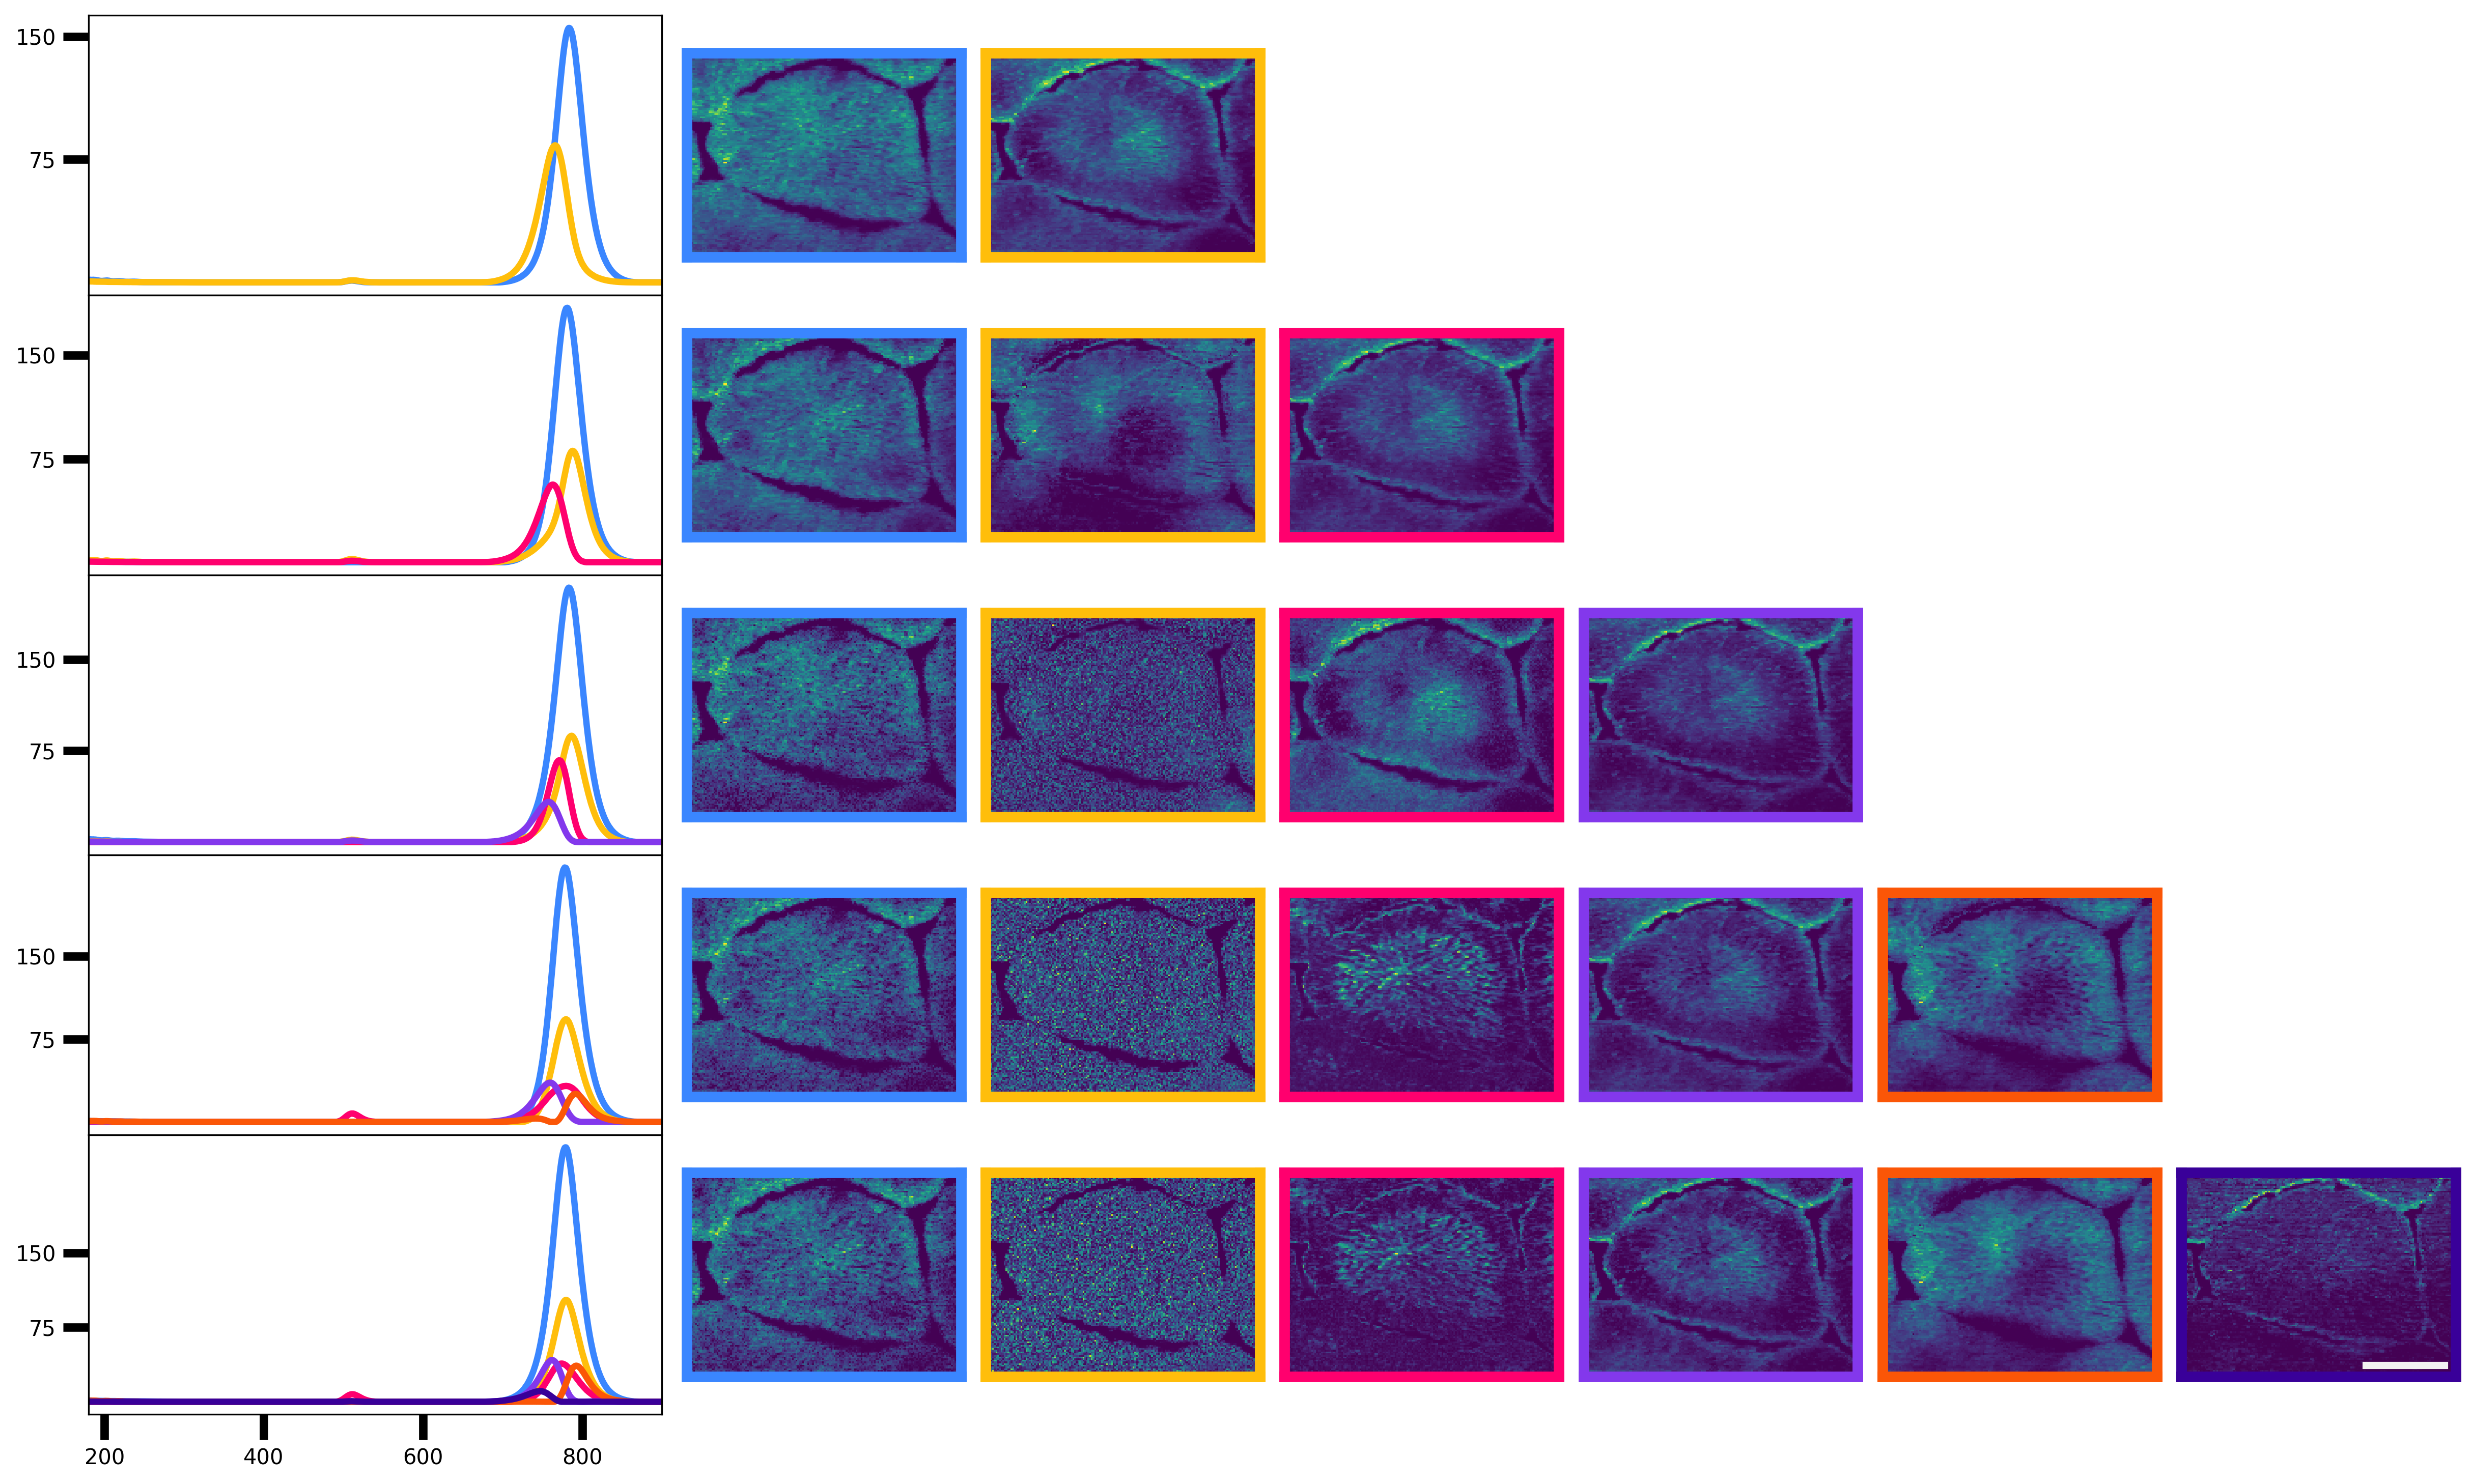

In [9]:
nmf_plot('Blind NMF plotting 2-6 components', f1_nmf_spect_matrices, 
         f1_nmf_img_matrices, f1_ypix, f1_xpix, f1_wav, 50)

### Figure 2

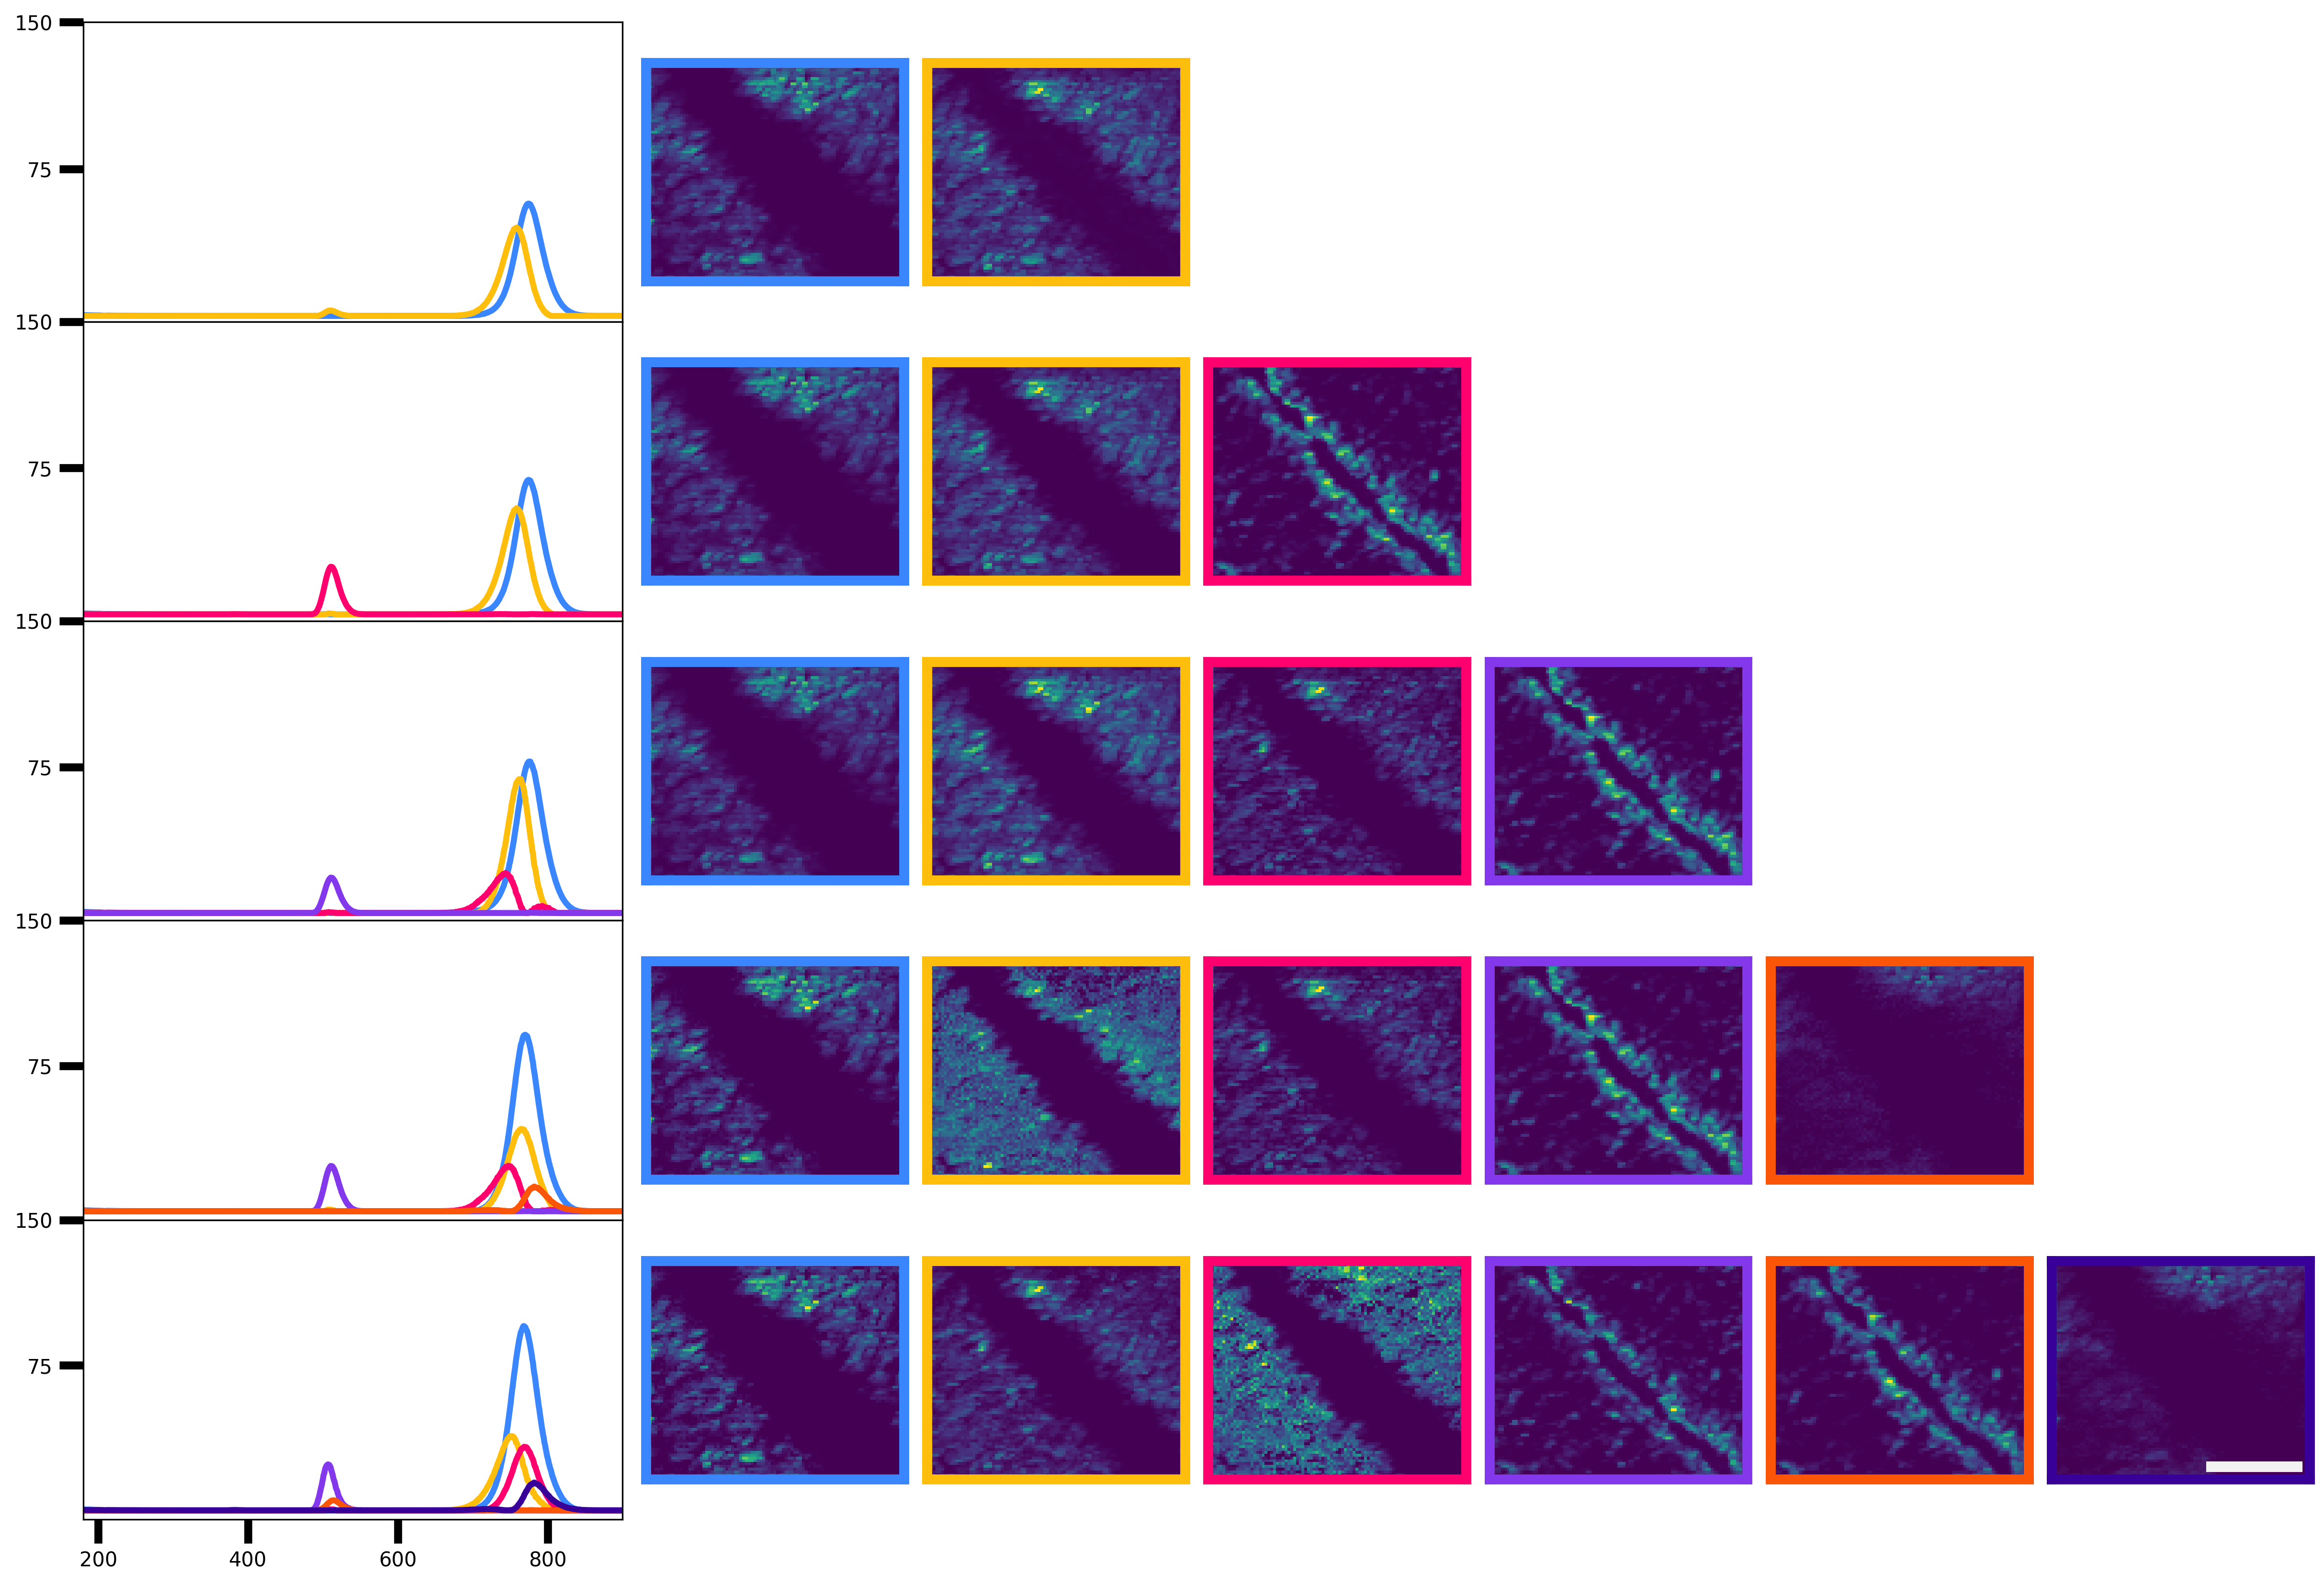

In [10]:
nmf_plot('Blind NMF plotting 2-6 components\nFigure 2', f2_nmf_spect_matrices, 
         f2_nmf_img_matrices, f2_ypix, f2_xpix, f2_wav, 33.333333333)

## Finding explained variance

Here we find the ability of the model to explain the variation in the data to assist in determining the necessary components with which to represent the data

In [29]:
f1_nmf_models = [f1_nmf_2comp, f1_nmf_3comp, f1_nmf_4comp, f1_nmf_5comp, f1_nmf_6comp]
f2_nmf_models = [f2_nmf_2comp, f2_nmf_3comp, f2_nmf_4comp, f2_nmf_5comp, f2_nmf_6comp]

In [30]:
def get_variance(model, data):
    """ Estimate performance of the model on the data """
    prediction = model.inverse_transform(model.transform(data))
    return metrics.explained_variance_score(data, prediction, multioutput="variance_weighted")

def error_analysis(models, data):
    temp = []
    for model in models:
        temp.append(get_variance(model.fit(data), data))
    return temp

In [31]:
f1_result = [error_analysis(f1_nmf_models, f1_denoised_2d)]
f2_result = [error_analysis(f2_nmf_models, f2_denoised_2d)]

In [53]:
def explained_variance_plot(f1_result, f2_result):

    fig = plt.figure(figsize=(4, 3))
    fig.patch.set_facecolor("#00000000")
    gs = GridSpec(1, 1)
    gs.update(wspace=0.1, hspace=0.1)
    plt.rcParams["font.weight"] = "bold"
    plt.rcParams["axes.labelweight"] = "bold"

    fig_plt = fig.add_subplot(gs[0, 0])
    fig_plt.plot([2, 3, 4, 5, 6], f1_result[0], ms=10, marker='o', lw=2, c=color[0], label="Figure 1")
    fig_plt.plot([2, 3, 4, 5, 6], f2_result[0], ms=10, marker='o', lw=2, c=color[2], label="Figure 2")

    fig.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    #fig_plt.set_title("Explained Variance for Blind NMF")
    #fig_plt.set_ylabel("EVR")
    #fig_plt.set_xlabel("Number of Components")
    fig_plt.set_ylim(0.978, 1.002)
    fig_plt.set_xticklabels([1, 2, 3, 4, 5, 6])
    fig_plt.tick_params(axis='both', direction='out', length=12, width=4)
    fig_plt.grid()

    plt.show()
    #fig.savefig('Graphs/final/4.1) Explained Variance.svg')

/var/folders/2t/38t43z9j1jbd04b_hsjlptfw0000gn/T/ipykernel_77403/4110834634.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig_plt.set_xticklabels([1, 2, 3, 4, 5, 6])


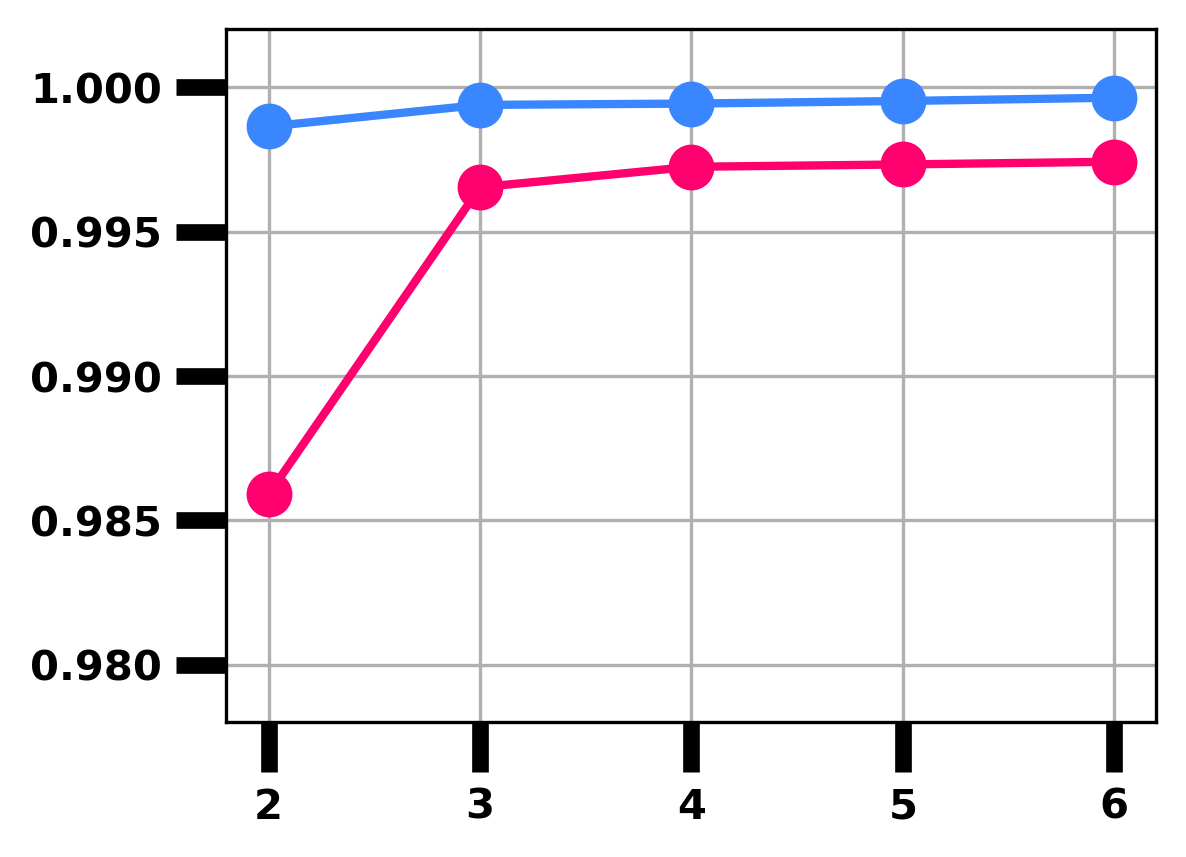

In [54]:
explained_variance_plot(f1_result, f2_result)

## Iteration investigation

Next, after deciding 3 components should be sufficient to represent 2 HP signatures and 1 PbI signature, we test the amount of iterations used to find the local minima that is enfored of the update function in the supervised model.

In [60]:
def nmf_model(data, iterations, components):
    """ Returns list of 2 matrices, W and H respectively"""
    nmf = NMF(n_components=components, init='random', solver='cd', beta_loss='frobenius', 
                tol=0, max_iter=iterations, random_state=None, alpha_W=0.0, 
                   alpha_H='same', l1_ratio=0.0, verbose=0, shuffle=False)
    W = nmf.fit_transform(data)
    H = nmf.components_
    return [W, H], nmf

In [56]:
def iter_plot(suptitle, iter_matrices, iteration_count, n_comp, xpix, ypix):

    rows = len(iteration_count)
    columns = n_comp + 2
    gs = GridSpec(rows, columns)
    gs.update(wspace=0.1,hspace=0.1)
    figsize = (columns*4, rows*3)
    
    fig = plt.figure(figsize=figsize, dpi=800)
    fig.patch.set_facecolor('white')
    #fig.suptitle(suptitle, fontsize=30)

    row_count = 0
    for i in range(rows):
        
        fig_plt = fig.add_subplot(gs[row_count,columns-2:])
        fig_plt.set_xticks([])
        fig_plt.set_yticks([])

        column_count = 0
        for j in range(columns-2):

            fig_img = fig.add_subplot(gs[row_count,column_count])
            fig_img.imshow(iter_matrices[row_count][1][column_count,:].reshape(ypix, xpix))
            fig_img.set_xticks([])
            fig_img.set_yticks([])
            fig_img.tick_params(color=color[j])
            for spine in fig_img.spines.values():
                spine.set_edgecolor(color[j])
                spine.set(lw=5)

            fig_plt.plot(iter_matrices[row_count][0][spect_range_b:spect_range_t,column_count],
                         c=color[j], lw=3)
            fig_plt.set_title(str(iteration_count[row_count])+" iterations", y=1.0, pad=-14)

            column_count += 1

        row_count += 1
        
    #fig.savefig('Graphs/final/6.1b) Iteration Investigation (sklearn).svg')

In [62]:
def iter_calc(img, iter_matrices, iter_models):
    for i in iteration_count:
        matrices, model = nmf_model(img, i, n_comp)
        iter_matrices.append(matrices)
        iter_models.append(model)

In [63]:
iteration_count = [10, 50, 100, 500, 1000, 5000, 10000]
n_comp = 3

### Figure 1

In [65]:
f1_iter_matrices = []
f1_iter_models = []
iter_calc(f1_denoised_2d, f1_iter_matrices, f1_iter_models)

In [21]:
iter_plot("Iteration investigation with figure 1", f1_iter_matrices, iteration_count,
         n_comp, f1_xpix, f1_ypix)

### Figure 2

In [68]:
f2_iter_matrices = []
f2_iter_models = []
iter_calc(f1_denoised_2d, f1_iter_matrices, f1_iter_models)

In [23]:
iter_plot("Iteration investigation with figure 2", f2_iter_matrices, iteration_count,
         n_comp, f2_xpix, f2_ypix)

### EVR

In [69]:
def iter_evr_plot(f1_result, f2_result):
    
    points = len(iteration_count)

    fig = plt.figure(figsize=(4, 3))
    #fig.patch.set_facecolor("#00000000")
    gs = GridSpec(1, 1)
    gs.update(wspace=0.1, hspace=0.1)
    #plt.rcParams["font.weight"] = "bold"
    #plt.rcParams["axes.labelweight"] = "bold"

    fig_plt = fig.add_subplot(gs[0, 0])
    fig_plt.plot(iteration_count, f1_result[0], ms=10, marker='o', lw=2, c=color[0], label="Figure 1")
    fig_plt.plot(iteration_count, f2_result[0], ms=10, marker='o', lw=2, c=color[2], label="Figure 2")

    fig.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    #fig_plt.set_title("Explained Variance for Blind NMF")
    #fig_plt.set_ylabel("EVR")
    #fig_plt.set_xlabel("Number of Components")
    fig_plt.set_ylim(0.5, 1.002)
    #fig_plt.set_xticklabels(iteration_count)
    fig_plt.tick_params(axis='both', direction='out', length=12, width=4)
    fig_plt.grid()

    plt.show()

In [70]:
f1_iter_result = [error_analysis(f1_iter_models, f1_denoised_2d)]
f2_iter_result = [error_analysis(f2_iter_models, f2_denoised_2d)]

In [71]:
iter_evr_plot(f1_iter_result, f2_iter_result)

# Analysis with Nimfa

## Blind NMF with 2-4 components

In [24]:
nimfa_nmf_iterations = 200
nimfa_nmf_update = 'divergence'

In [25]:
f1_nimfa_nmf_2comp = nimfa.Nmf(f1_denoised_2d, max_iter=nimfa_nmf_iterations, rank=2, 
                               update=nimfa_nmf_update, objective='fro')
f1_nimfa_nmf_2comp_fit = f1_nimfa_nmf_2comp()
W_f1_nimfa_nmf_2comp = f1_nimfa_nmf_2comp_fit.basis()
H_f1_nimfa_nmf_2comp = f1_nimfa_nmf_2comp_fit.coef()

f1_nimfa_nmf_3comp = nimfa.Nmf(f1_denoised_2d, max_iter=nimfa_nmf_iterations, rank=3, 
                               update=nimfa_nmf_update, objective='fro')
f1_nimfa_nmf_3comp_fit = f1_nimfa_nmf_3comp()
W_f1_nimfa_nmf_3comp = f1_nimfa_nmf_3comp_fit.basis()
H_f1_nimfa_nmf_3comp = f1_nimfa_nmf_3comp_fit.coef()

f1_nimfa_nmf_4comp = nimfa.Nmf(f1_denoised_2d, max_iter=nimfa_nmf_iterations, rank=4, 
                               update=nimfa_nmf_update, objective='fro')
f1_nimfa_nmf_4comp_fit = f1_nimfa_nmf_4comp()
W_f1_nimfa_nmf_4comp = f1_nimfa_nmf_4comp_fit.basis()
H_f1_nimfa_nmf_4comp = f1_nimfa_nmf_4comp_fit.coef()

In [26]:
f1_nimfa_nmf_spect_matrices = [W_f1_nimfa_nmf_2comp, W_f1_nimfa_nmf_3comp, W_f1_nimfa_nmf_4comp]
f1_nimfa_nmf_img_matrices = [H_f1_nimfa_nmf_2comp, H_f1_nimfa_nmf_3comp, H_f1_nimfa_nmf_4comp]

In [27]:
f2_nimfa_nmf_2comp = nimfa.Nmf(f2_denoised_2d, max_iter=nimfa_nmf_iterations, rank=2, 
                               update=nimfa_nmf_update, objective='fro')
f2_nimfa_nmf_2comp_fit = f2_nimfa_nmf_2comp()
W_f2_nimfa_nmf_2comp = f2_nimfa_nmf_2comp_fit.basis()
H_f2_nimfa_nmf_2comp = f2_nimfa_nmf_2comp_fit.coef()

f2_nimfa_nmf_3comp = nimfa.Nmf(f2_denoised_2d, max_iter=nimfa_nmf_iterations, rank=3, 
                               update=nimfa_nmf_update, objective='fro')
f2_nimfa_nmf_3comp_fit = f2_nimfa_nmf_3comp()
W_f2_nimfa_nmf_3comp = f2_nimfa_nmf_3comp_fit.basis()
H_f2_nimfa_nmf_3comp = f2_nimfa_nmf_3comp_fit.coef()

f2_nimfa_nmf_4comp = nimfa.Nmf(f2_denoised_2d, max_iter=nimfa_nmf_iterations, rank=4, 
                               update=nimfa_nmf_update, objective='fro')
f2_nimfa_nmf_4comp_fit = f2_nimfa_nmf_4comp()
W_f2_nimfa_nmf_4comp = f2_nimfa_nmf_4comp_fit.basis()
H_f2_nimfa_nmf_4comp = f2_nimfa_nmf_4comp_fit.coef()

In [28]:
f2_nimfa_nmf_spect_matrices = [W_f2_nimfa_nmf_2comp, W_f2_nimfa_nmf_3comp, W_f2_nimfa_nmf_4comp]
f2_nimfa_nmf_img_matrices = [H_f2_nimfa_nmf_2comp, H_f2_nimfa_nmf_3comp, H_f2_nimfa_nmf_4comp]

### Figure 1

In [35]:
nmf_plot("Blind NMF plotting 2-4 components\nFigure 1", f1_nimfa_nmf_spect_matrices, 
         f1_nimfa_nmf_img_matrices, f1_ypix, f1_xpix, f1_wav, 50)

In [36]:
nmf_plot("Blind NMF plotting 2-4 components\nFigure 1", f1_nimfa_nmf_spect_matrices, 
         f1_nimfa_nmf_img_matrices, f1_ypix, f1_xpix, f1_wav, 50)

### Figure 2

In [ ]:
nmf_plot("Blind NMF plotting 2-4 components\nFigure 2", f2_nimfa_nmf_spect_matrices, 
         f2_nimfa_nmf_img_matrices, f2_ypix, f2_xpix, 33.333333333)

In [ ]:
nmf_plot("Blind NMF plotting 2-4 components\nFigure 2", f2_nimfa_nmf_spect_matrices, 
         f2_nimfa_nmf_img_matrices, f2_ypix, f2_xpix, f1_wav, 33.333333333)

## Iteration investigation

In [ ]:
n_comp = 3

### Code

In [ ]:
def nimfa_nmf_model(data, iterations, components):
    """ Returns list of 2 matrices, W and H respectively"""
    nmf = nimfa.Nmf(data, max_iter=iterations, rank=components, 
                               update=nimfa_nmf_update, objective='fro')
    nmf_fit = nmf()
    W = nmf_fit.basis()
    H = nmf_fit.coef()
    return [W, H]

### Figure 1

In [ ]:
f1_nimfa_iter_matrices = []

In [ ]:
for i in iteration_count:
    f1_nimfa_iter_matrices.append(nimfa_nmf_model(f1_denoised_2d, i, n_comp))

In [ ]:
iter_plot("Iteration investigation with Nimfa\nfigure 1", f1_nimfa_iter_matrices, 
        iteration_count, n_comp, f1_xpix, f1_ypix)

### Figure 2

In [ ]:
f2_nimfa_iter_matrices = []

In [ ]:
for i in iteration_count:
    f2_nimfa_iter_matrices.append(nimfa_nmf_model(f2_denoised_2d, i, n_comp))

In [ ]:
iter_plot("Iteration investigation with Nimfa\nfigure 2", f2_nimfa_iter_matrices, 
          iteration_count, n_comp, f2_xpix, f2_ypix)

## Sparseness in spectral and image components

Sparseness is the degree to which a matrix is populated by zeros. This parameter enforces greater sparseness in the final deocmposition matrices in the update function.

### Code

In [37]:
def snmf_model(data, sparseness_level, n_comp, iterations, version):
    """ Returns list of 2 matrices, W and H respectively"""
    snmf = nimfa.Snmf(data, rank=n_comp, max_iter=iterations, version=version, 
                      beta=sparseness_level)
    snmf_fit = snmf()
    W = snmf_fit.basis()
    H = snmf_fit.coef()
    return [W, H, snmf_fit.fit.sparseness()]

In [38]:
def snmf_plot(suptitle, snmf_matrices, sparseness_levels, n_comp, xpix, ypix):

    rows = len(sparseness_levels)
    columns = n_comp + 2
    gs = GridSpec(rows, columns)
    gs.update(wspace=0.1,hspace=0.1)
    figsize = (columns*4, rows*3)
    
    fig = plt.figure(figsize=figsize, dpi=800)
    fig.patch.set_facecolor('white')
    #fig.suptitle(suptitle, fontsize=30)

    row_count = 0
    for i in range(rows):
        
        fig_plt = fig.add_subplot(gs[row_count,columns-2:])
        fig_plt.set_xticks([])
        fig_plt.set_yticks([])

        column_count = 0
        for j in range(columns-2):

            fig_img = fig.add_subplot(gs[row_count,column_count])
            fig_img.imshow(snmf_matrices[row_count][1][column_count,:].reshape(ypix, xpix))
            fig_img.set_xticks([])
            fig_img.set_yticks([])
            fig_img.tick_params(color=color[j])
            for spine in fig_img.spines.values():
                spine.set_edgecolor(color[j])
                spine.set(lw=5)

            fig_plt.plot(snmf_matrices[row_count][0][spect_range_b:spect_range_t,column_count],
                         c=color[j], lw=3)
            #fig_plt.set_title(
                #"beta = {:} \nW sparseness = {:.3f} \nH sparseness = {:.3f}".format(
                        #sparseness_levels[row_count],
                        #snmf_matrices[row_count][2][0],
                        #snmf_matrices[row_count][2][1]), y=1.0, pad=-40)

            column_count += 1

        row_count += 1
    
    #fig.savefig('Graphs/final/9.1.2b) NMF with sparseness in spectral components (nimfa).svg')

In [42]:
snmf_n_comp = 3
snmf_iterations = 200
snmf_sparseness_levels = [1e-8, 1e-4, 1e-3, 0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1.0, 1.5, 2.0, 3.0]

f1_nimfa_spect_snmf_matrices = []
f2_nimfa_spect_snmf_matrices = []

f1_nimfa_img_snmf_matrices = []
f2_nimfa_img_snmf_matrices = []

### Sparseness in spectral components (W)

#### Figure 1

In [43]:
for i in snmf_sparseness_levels:
    f1_nimfa_spect_snmf_matrices.append(snmf_model(f1_denoised_2d, i, snmf_n_comp, 
                                                   snmf_iterations, 'l'))

In [44]:
snmf_plot("Sparseness in spectral components\nFigure 1", f1_nimfa_spect_snmf_matrices, 
          snmf_sparseness_levels, snmf_n_comp, f1_xpix, f1_ypix)

#### Single

In [ ]:
def snmf_single_plot(suptitle, snmf_matrices, sparseness_levels, n_comp, 
                     xpix, ypix, scalebar_size):

    rows = 1
    columns = n_comp + 2
    gs = GridSpec(rows, columns)
    gs.update(wspace=0.09,hspace=0)
    figsize = (columns*4, rows*3)
    
    fig = plt.figure(figsize=figsize, dpi=600)
    fig.patch.set_facecolor('#00000000')
    #fig.suptitle(suptitle, fontsize=30)

        
    fig_plt = fig.add_subplot(gs[0,:2])
    fig_plt.set_xticks([400-spect_range_b, 750-spect_range_b])
    fig_plt.set_yticks([10000, 20000])
    fig_plt.set_xticklabels([])
    fig_plt.set_yticklabels([])
    fig_plt.tick_params(axis='both', direction='out', length=12, width=4)

    column_count = 0
    for j in range(columns-2):

        fig_img = fig.add_subplot(gs[0,column_count+2])
        fig_img.imshow(snmf_matrices[5][1][column_count-2,:].reshape(ypix, xpix))
        fig_img.set_xticks([])
        fig_img.set_yticks([])
        fig_img.tick_params(color=color[j])
        for spine in fig_img.spines.values():
            spine.set_edgecolor(color[j])
            spine.set(lw=5)
        
        if column_count == columns-3:
            scalebar = AnchoredSizeBar(fig_img.transData, scalebar_size, " ", "lower right",
                           pad=0.3,
                           color='#F2F2F2',
                           frameon=False,
                           size_vertical=3,
                           label_top=True)
            fig_img.add_artist(scalebar)

        fig_plt.plot(snmf_matrices[5][0][spect_range_b:spect_range_t,column_count-2],
                         c=color[j], lw=3)

        column_count += 1
    
    #fig.savefig('Graphs/final/5.2) NMF with sparseness in spectral components (nimfa).svg')

In [ ]:
snmf_single_plot("Sparseness in spectral components\nFigure 1", f1_nimfa_spect_snmf_matrices, 
          snmf_sparseness_levels, snmf_n_comp, f1_xpix, f1_ypix, 50)

#### Figure 2

In [ ]:
for i in snmf_sparseness_levels:
    f2_nimfa_spect_snmf_matrices.append(snmf_model(f2_denoised_2d, i, snmf_n_comp, 
                                                   snmf_iterations, 'l'))

In [ ]:
snmf_plot("Sparseness in spectral components\nFigure 2", f2_nimfa_spect_snmf_matrices, 
          snmf_sparseness_levels, snmf_n_comp, f2_xpix, f2_ypix)

### Sparseness in image components (H)

#### Figure 1

In [ ]:
for i in snmf_sparseness_levels:
    f1_nimfa_img_snmf_matrices.append(snmf_model(f1_denoised_2d, i, snmf_n_comp, 
                                                   snmf_iterations, 'r'))

In [ ]:
snmf_plot("Sparseness in image components\nFigure 1", f1_nimfa_img_snmf_matrices, 
          snmf_sparseness_levels, snmf_n_comp, f1_xpix, f1_ypix)

#### Figure 2

In [ ]:
for i in snmf_sparseness_levels:
    f2_nimfa_img_snmf_matrices.append(snmf_model(f2_denoised_2d, i, snmf_n_comp, 
                                                   snmf_iterations, 'r'))

In [ ]:
snmf_plot("Sparseness in image components\nFigure 2", f2_nimfa_img_snmf_matrices, 
          snmf_sparseness_levels, snmf_n_comp, f2_xpix, f2_ypix)

## Bayesian Decomposition

Incomplete

In [ ]:
f1_bd_2comp = nimfa.Bd(f1_denoised_2d, seed="random_c", rank=2, max_iter=nimfa_nmf_iterations, 
            alpha=np.zeros((f1_denoised_2d.shape[0], 2)), beta=np.zeros((
            2, f1_denoised_2d.shape[1])), theta=.0, k=.0, sigma=1., skip=100, stride=1, 
            n_w=np.zeros((2, 1)), n_h=np.zeros((2, 1)), n_sigma=False)
f1_bd_2comp_fit = f1_bd_2comp()
W_f1_bd_2comp = f1_bd_2comp_fit.basis()
H_f1_bd_2comp = f1_bd_2comp_fit.coef()

f1_bd_3comp = nimfa.Bd(f1_denoised_2d, seed="random_c", rank=3, max_iter=nimfa_nmf_iterations, 
            alpha=np.zeros((f1_denoised_2d.shape[0], 3)), beta=np.zeros((
            3, f1_denoised_2d.shape[1])), theta=.0, k=.0, sigma=1., skip=100, stride=1, 
            n_w=np.zeros((3, 1)), n_h=np.zeros((3, 1)), n_sigma=False)
f1_bd_3comp_fit = f1_bd_3comp()
W_f1_bd_3comp = f1_bd_3comp_fit.basis()
H_f1_bd_3comp = f1_bd_3comp_fit.coef()

f1_bd_4comp = nimfa.Bd(f1_denoised_2d, seed="random_c", rank=4, max_iter=nimfa_nmf_iterations, 
            alpha=np.zeros((f1_denoised_2d.shape[0], 4)), beta=np.zeros((
            4, f1_denoised_2d.shape[1])), theta=.0, k=.0, sigma=1., skip=100, stride=1, 
            n_w=np.zeros((4, 1)), n_h=np.zeros((4, 1)), n_sigma=False)
f1_bd_4comp_fit = f1_bd_4comp()
W_f1_bd_4comp = f1_bd_4comp_fit.basis()
H_f1_bd_4comp = f1_bd_4comp_fit.coef()

In [ ]:
f1_bd_spect_matrices = [W_f1_bd_2comp, W_f1_bd_3comp, W_f1_bd_4comp]
f1_bd_img_matrices = [H_f1_bd_2comp, H_f1_bd_3comp, H_f1_bd_4comp]

In [ ]:
f2_bd_2comp = nimfa.Bd(f2_denoised_2d, seed="random_c", rank=2, max_iter=nimfa_nmf_iterations, 
            alpha=np.zeros((f2_denoised_2d.shape[0], 2)), beta=np.zeros((
            2, f2_denoised_2d.shape[1])), theta=.0, k=.0, sigma=1., skip=100, stride=1, 
            n_w=np.zeros((2, 1)), n_h=np.zeros((2, 1)), n_sigma=False)
f2_bd_2comp_fit = f2_bd_2comp()
W_f2_bd_2comp = f2_bd_2comp_fit.basis()
H_f2_bd_2comp = f2_bd_2comp_fit.coef()

f2_bd_3comp = nimfa.Bd(f2_denoised_2d, seed="random_c", rank=3, max_iter=nimfa_nmf_iterations, 
            alpha=np.zeros((f2_denoised_2d.shape[0], 3)), beta=np.zeros((
            3, f2_denoised_2d.shape[1])), theta=.0, k=.0, sigma=1., skip=100, stride=1, 
            n_w=np.zeros((3, 1)), n_h=np.zeros((3, 1)), n_sigma=False)
f2_bd_3comp_fit = f2_bd_3comp()
W_f2_bd_3comp = f2_bd_3comp_fit.basis()
H_f2_bd_3comp = f2_bd_3comp_fit.coef()

f2_bd_4comp = nimfa.Bd(f2_denoised_2d, seed="random_c", rank=4, max_iter=nimfa_nmf_iterations, 
            alpha=np.zeros((f2_denoised_2d.shape[0], 4)), beta=np.zeros((
            4, f2_denoised_2d.shape[1])), theta=.0, k=.0, sigma=1., skip=100, stride=1, 
            n_w=np.zeros((4, 1)), n_h=np.zeros((4, 1)), n_sigma=False)
f2_bd_4comp_fit = f2_bd_4comp()
W_f2_bd_4comp = f2_bd_4comp_fit.basis()
H_f2_bd_4comp = f2_bd_4comp_fit.coef()

In [ ]:
f2_bd_spect_matrices = [W_f2_bd_2comp, W_f2_bd_3comp, W_f2_bd_4comp]
f2_bd_img_matrices = [H_f2_bd_2comp, H_f2_bd_3comp, H_f2_bd_4comp]

### Figure 1

In [ ]:
nmf_plot("Bayesian Decomposition plotting 2-4 components\nFigure 1", f1_bd_spect_matrices, 
         f1_bd_img_matrices, f1_ypix, f1_xpix)

### Figure 2

In [ ]:
nmf_plot("Bayesian Decomposition plotting 2-4 components\nFigure 2", f2_bd_spect_matrices, 
         f2_bd_img_matrices, f2_ypix, f2_xpix)